In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def initialize_centroids(self, data):
        random_indices = np.random.randint(data.shape[0], size=self.n_clusters)
        centroids=data[random_indices]
        return centroids

    def assign_to_clusters(self, data, centroids):
      clusters = []

      for point in data:
          distances = []
          for centroid in centroids:

              distance = np.sqrt(np.sum((point - centroid) ** 2))  # Euclidean distance
              distances.append(distance)

          min_distance=888
          for i, distance in enumerate(distances):
            if (distance<min_distance):
              min_distance=distance
              closest = i

          clusters.append(closest)

      # Convert the list of cluster assignments to a numpy array and return
      return np.array(clusters)


    def update_centroids(self, data, clusters):
      new_centroids = []

      for i in range(self.n_clusters):
          # Initialize sum for each dimension of centroid
          centroid_sum = [0] * len(data[0])   #list of zeroes
          count = 0

          # Accumulate sum of each dimension for points in cluster i
          for j in range(len(clusters)):
              if clusters[j] == i:
                  count += 1
                  for dim in range(len(data[j])):
                      centroid_sum[dim] += data[j][dim]

          # Calculate centroid as mean of points in cluster i
          if count > 0:
            for dim in range(len(centroid_sum)):
                centroid_sum[dim] /= count
            centroid = centroid_sum

          else:
              # If no points assigned to cluster, set centroid to zero
              centroid = [0] * len(data[0])

          new_centroids.append(centroid)

      return new_centroids


    def fit(self, data):
        centroids = self.initialize_centroids(data)

        for _ in range(self.max_iterations):
            clusters = self.assign_to_clusters(data, centroids)
            new_centroids = self.update_centroids(data, clusters)

            if np.array_equal(centroids, new_centroids):
                break

            centroids = new_centroids

        self.cen = centroids
        self.lab = clusters

In [12]:
import pandas as pd
iris = pd.read_csv("iris_csv.csv")
iris
data = iris.iloc[:, 2:4].values
iris['class'].unique()
#data.shape
#data[3]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
k = 4
model = KMeansCustom(n_clusters=k)
model.fit(data)

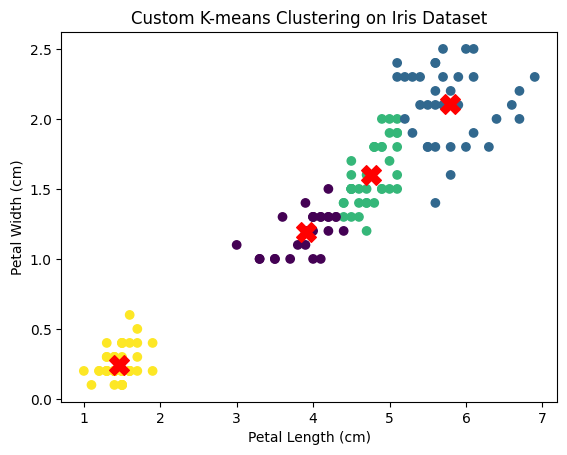

In [14]:
plt.scatter(data[:, 0], data[:, 1], c=model.lab, cmap='viridis')
centroids_array = np.array(model.cen)  # Convert centroids to a NumPy array
plt.scatter(centroids_array[:, 0], centroids_array[:, 1], marker='X', s=200, c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Custom K-means Clustering on Iris Dataset')
plt.show()